# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

Добавил подсчет количества, строк таблицы: 1) с потерянными данными, чтобы сделать вывод о качестве предоставленной информации (broken_data), 2) исходное количество (full_data)

In [3]:
full_data   = len(data)
broken_data = data.isna().any(axis=1).sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**


Для вывода о причинах пропуска можно соотнести - совпадают ли пропуски в "днях на работе" и в "доходах".


In [5]:
errors_coinc = data.loc[(data['days_employed'].isna()) & (data['total_income'].isna())].shape[0]
print (f'В скольких графах совпадение по дням без работы и доходу: {errors_coinc} ')


В скольких графах совпадение по дням без работы и доходу: 2174 



Совпадает с общим числом пропусков, полученным выше.


In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

Определим общие параметры используемые во всех дальнейших ответах:

In [23]:
total_count = len(data)
print(f'Общее число займов: {total_count}')
print(f'Процент некачественных данных (в начале): {broken_data/total_count} %')
print(f'Процент безвозвратно утерянных строк: {(full_data-total_count)/total_count} %')
print(f'Процент восстановленных строк: {(broken_data -(full_data-total_count))/total_count} %')
print(f'Процент некачественных данных (в итоге): {(full_data-total_count)/total_count} %')
debt_relat  = (data['debt'].sum()/total_count*100).round(2)
print(f'Средневзвешенная доля должников: {debt_relat} %')

Общее число займов: 21331
Процент некачественных данных (в начале): 0.10191739721532042 %
Процент безвозвратно утерянных строк: 0.009094744737705687 %
Процент восстановленных строк: 0.09282265247761474 %
Процент некачественных данных (в итоге): 0.009094744737705687 %
Средневзвешенная доля должников: 8.12 %


1) Доля некачественных данных в изначальной таблице крайне низка ~ 0.11 %;
2) После обработки доля безвозвратно утеряных для анализа ~ 0.01 %;
3) Средневзвешенная доля должников: 8.12 %.

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для наглядности данных, целесообразно создать таблицу со следующими столбцами, в зависимости от количества детей в семьях:
   - активность заемщиков (общее число действий с кредитами);
   - доля каждой группы к общему числу займов;
   - количество имевших задолжности;
   - доля имевших задолжности.

Цели:
1. Соотнести значимость групп по доли займов к общему числу займов;
2. Определить процент невозврата кредитов по группам;
3. Сделать вывод о необходимости учета количества детей при выдачи кредитов.

In [24]:
names_of_rows = ['Всего людей с кредитами, ч', 'Имевшие задолжность, ч']
category = 'children'
group_comp = data.groupby(by=category).aggregate({'debt':['count','sum']}).reset_index(drop=True)
group_comp.columns = names_of_rows
group_comp.insert (1, "Доля группы от общего числа заемщиков, %", (group_comp['Всего людей с кредитами, ч']/total_count/0.01).round(2))
group_comp["Доля имевших задолжности по группам, %"] = (group_comp['Имевшие задолжность, ч']/group_comp['Всего людей с кредитами, ч']/0.01).round(2)
group_comp.index.name = 'Кол-во детей в семье, ч'
print(f'Средневзвешенная доля должников: {debt_relat} %')
group_comp.sort_values(by='Доля имевших задолжности по группам, %')

Средневзвешенная доля должников: 8.12 %


,"Всего людей с кредитами, ч","Доля группы от общего числа заемщиков, %","Имевшие задолжность, ч","Доля имевших задолжности по группам, %"
"Кол-во детей в семье, ч",,,,
5,9,0.04,0,0.00
0,14091,66.06,1063,7.54
3,330,1.55,27,8.18
1,4808,22.54,444,9.23
2,2052,9.62,194,9.45
4,41,0.19,4,9.76


#### Результаты:
1)  Количественная оценка по распределению заемщиков показала, что доля займов людей с 4 и 5 детьми не превышает 0.2 % от общего числа займов, а заемщиков с 3 детьми около 1.5 %;
2)  Средневзвешенный процент людей с задолжностями составил 8.12 %;
3)  Для всех группа с детьми процент выше, чем для бездетных заемщиков (Распределение приведено на диаграмме ниже);
4)  Для заемщиков с 5 детьми отсутствуют задолжности по кредитам, но так как их всего 9 человек (0.042 % от общего числа заемщиков) это может быть случайностью.
    

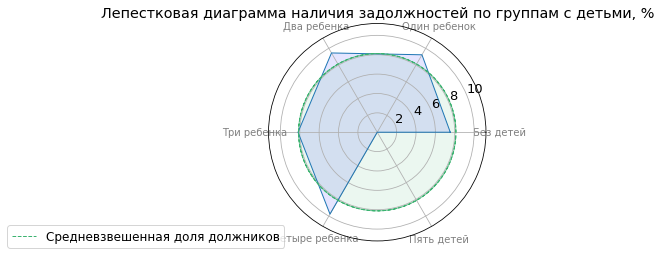

In [25]:
name_of_status= ['Без детей', 'Один ребенок', 'Два ребенка', 'Три ребенка', 'Четыре ребенка', 'Пять детей' ]
N = len(name_of_status)
plt.rcParams['font.size'] = 12
# Данные для диаграммы
theta = np.linspace(0, 2 * np.pi, N, endpoint=False) 
theta = np.append(theta, theta[:1])
radii = group_comp["Доля имевших задолжности по группам, %"].values
radii = np.append(radii, radii[:1])
# Отображение srider диаграммы для анализа
plt.subplot(111, polar=True)
plt.rcParams["figure.figsize"]=5,8
plt.title('Лепестковая диаграмма наличия задолжностей по группам с детьми, %')
plt.xticks(theta[:-1], name_of_status, color="grey", size=10)
yticks_vals = [ 2, 4 , 6 , 8 , 10]
yticks_names= ["2", "4", "6", "8", "10"]
plt.yticks(yticks_vals, yticks_names, size=13)
plt.ylim(0,1.15*max(radii))
plt.plot(theta, radii, linewidth=1, linestyle='solid')
plt.fill(theta, radii, 'b', alpha=0.1)
# Среднее значение просрочки кредитов
theta1 = np.linspace(0, 2 * np.pi, 250, endpoint=False) 
theta1 = np.append(theta1, theta1[:-1])
radii1 = debt_relat*np.ones(250)
radii1 = np.append(radii1, radii1[:-1])
plt.plot(theta1, radii1, linewidth=1, linestyle='--', label="Средневзвешенная доля должников",  color="#3CB371")
plt.fill(theta1, radii1, "#3CB371", alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

В следствии малого числа заемщиков в категориях 3-5 детей, можно объединить эти группы с группой 3 ребенка. Таком образом получиться общая группа "3 и более детей". 

In [26]:
group_comp_next = group_comp.loc['0':'2'].copy()
all_people = group_comp.loc['3':'5', 'Всего людей с кредитами, ч'].sum() 
dept_people = group_comp.loc['3':'5', 'Имевшие задолжность, ч'].sum() 
row = [all_people, all_people/total_count*100, dept_people, dept_people/all_people*100]
group_comp_next.loc[3]= np.round(row,2)
group_comp_next

,"Всего людей с кредитами, ч","Доля группы от общего числа заемщиков, %","Имевшие задолжность, ч","Доля имевших задолжности по группам, %"
"Кол-во детей в семье, ч",,,,
0,14091.0,66.06,1063.0,7.54
1,4808.0,22.54,444.0,9.23
2,2052.0,9.62,194.0,9.45
3,380.0,1.78,31.0,8.16


После сведения в строку "3 и более детей" ничего приницпиально не поменялось. Без детей возвращают кредиты лучше. Для новой группы показатель чуть-чуть лучше (в сравнении с 1-2 ребенка), но вполне возможна статистическая ошибка. Можно попробовать свернуть в группу до "2 и более детей"

In [27]:
group_comp_next2 = group_comp.loc['0':'1'].copy()
all_people = group_comp.loc['2':'5', 'Всего людей с кредитами, ч'].sum() 
dept_people = group_comp.loc['2':'5', 'Имевшие задолжность, ч'].sum() 
row = [all_people, all_people/total_count*100, dept_people, dept_people/all_people*100]
group_comp_next2.loc[2]= np.round(row,2)
group_comp_next2

,"Всего людей с кредитами, ч","Доля группы от общего числа заемщиков, %","Имевшие задолжность, ч","Доля имевших задолжности по группам, %"
"Кол-во детей в семье, ч",,,,
0,14091.0,66.06,1063.0,7.54
1,4808.0,22.54,444.0,9.23
2,2432.0,11.40,225.0,9.25


Теперь группы могут быть соотнесены по доли заемщиков в каждой - 66 %, 22.5% и 11.5 %. В таком представлении количество детей не влияет на задолжность, но сам факт наличия ребенка, немного повышает шанс ee иметь 9.2% против 7.5% у бездетных.

**Вывод:** 
- Данные по кредитам для группы с 4-5 детьми не кажутся значимыми ввиду малого числа заемщиков ( до ~ 0.6 % );
- При объединении данных в новую группу 3+ детей, для нее уровень возврата стал несколько ниже чем для групп с 1 и 2 ребенком, но выше чем для группы без детей;
- Группы 1 или 2+ детей имеют равный процент задолжностей 9.2% против 7.5% у бездетных, что характеризует людей с детьми как несколько более худших плательщиков.
  
**Рекомендации:**
- Учесть наличие 1 и 2 детей при выдачи кредитов, как приводящее к росту задолжности(+ 1.7%);
- В целях привлечения новых клиентов и проведения рекламной компании можно применить дополнительные меры поощрения к семьям с 3+ детей,  ввиду их малого количества (предварительно оценить финансовую целесообразность). Хотя процент возврата здесь несколько хуже чем у бездетных (+0.62%), но лучше чем у семей с 1-2 ребенка (-1.1%).

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для наглядности данных (по аналогии с оценкой влияния детей), целесообразно создать таблицу со следующими столбцами, в зависимости от семейного статуса:
   - активность заемщиков (общее число действий с кредитами);
   - доля каждой группы к общему числу займов;
   - количество имевших задолжности;
   - доля имевших задолжности.
     
Цели:
1. Соотнести значимость групп по доли займов к общему числу займов;
2. Определить процент невозврата кредитов по группам;
3. Сделать вывод о необходимости учета семейного статуса при выдачи кредитов.

In [28]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
names_of_rows = ['Всего людей с кредитами, ч', 'Имевшие задолжность, ч']
name_of_status = data['family_status'].unique()
category = 'family_status_id'
group_comp1 = data.groupby(by=category).aggregate({'debt':['count','sum']}).reset_index(drop=True)
group_comp1.columns = names_of_rows
group_comp1.insert (1, "Доля группы от общего числа заемщиков, %", (group_comp1['Всего людей с кредитами, ч']/total_count/0.01).round(2))
group_comp1["Доля имевших задолжности по группам, %"] = (group_comp1['Имевшие задолжность, ч']/group_comp1['Всего людей с кредитами, ч']/0.01).round(2)
group_comp1.insert (0, "Семейное положение", name_of_status)
print(f'Средневзвешенная доля должников: {debt_relat} %')
group_comp1.sort_values(by='Доля имевших задолжности по группам, %')


Средневзвешенная доля должников: 8.12 %


,Семейное положение,"Всего людей с кредитами, ч","Доля группы от общего числа заемщиков, %","Имевшие задолжность, ч","Доля имевших задолжности по группам, %"
2,вдовец / вдова,951,4.46,63,6.62
3,в разводе,1189,5.57,84,7.06
0,женат / замужем,12261,57.48,927,7.56
1,гражданский брак,4134,19.38,385,9.31
4,Не женат / не замужем,2796,13.11,273,9.76


#### Результаты:
1) Группы выборки соизмеримы по размеру и может быть проведена оценка в представленной конфигурации (можно объединить "вдовец / вдова" и "в разводе", но на числа это не повлияет)
2) Количественная оценка по распределению заемщиков показала, наибольшее число людей имеющих кредиты состоят в браке (57 %),  а наименьшее по тем или иным причинам с браком завязало (6 % - "в разводе", 4 % - "потеря партнера");
3) Хуже всего с возвратом кредитов обстоят дела у группы  "Не женат / не замужем" - 9.76% или состоящих "в гражданском браке" - 9.31 %;
4) Лучше всего возвращают кредиты - закончившие официальные отношения (7.06% и 6.62%, в разводе и вдовец / вдова соответственно )

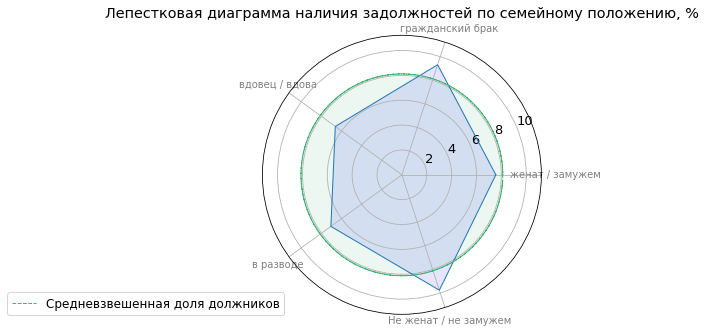

In [29]:
# Данные для диаграммы
N = len(name_of_status)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False) 
theta = np.append(theta, theta[:1])
radii = group_comp1["Доля имевших задолжности по группам, %"].values
radii = np.append(radii, radii[:1])
# Отображение srider диаграммы для анализа
plt.subplot(111, polar=True)
plt.rcParams["figure.figsize"]=5,8
plt.title('Лепестковая диаграмма наличия задолжностей по семейному положению, %')
plt.xticks(theta[:-1], name_of_status, color="grey", size=10)
yticks_vals = [ 2, 4 , 6 , 8 , 10]
yticks_names= ["2", "4", "6", "8", "10"]
plt.yticks(yticks_vals, yticks_names, size=13)
plt.ylim(0,1.15*max(radii))
plt.plot(theta, radii, linewidth=1, linestyle='solid')
plt.fill(theta, radii, 'b', alpha=0.1)
# Среднее значение просрочки кредитов
theta1 = np.linspace(0, 2 * np.pi, 250, endpoint=False) 
theta1 = np.append(theta1, theta1[:-1])
radii1 = debt_relat*np.ones(250)
radii1 = np.append(radii1, radii1[:-1])
plt.plot(theta1, radii1, linewidth=1, linestyle='--', label="Средневзвешенная доля должников",  color="#3CB371")
plt.fill(theta1, radii1, "#3CB371", alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

Так как некоторые группы схожи по доли задолжностей по кредитам, можно попробовать несколько перегруппировать данные

In [30]:
name_of_status_new = ['Оформленные отношения', 'Вне брака/гражданский брак', 'Развод/потеря партнера']
group_comp1_next = group_comp1.iloc[0:1].copy().reset_index(drop=True)
group_comp1_next = group_comp1_next.drop(columns='Семейное положение')

all_people = group_comp1.loc[[1, 4], 'Всего людей с кредитами, ч'].sum() 
dept_people = group_comp1.loc[[1, 4], 'Имевшие задолжность, ч'].sum() 
row = [all_people, all_people/total_count*100, dept_people, dept_people/all_people*100]
group_comp1_next.loc[1]= np.round(row,2)

all_people = group_comp1.loc[[2, 3], 'Всего людей с кредитами, ч'].sum() 
dept_people = group_comp1.loc[[2, 3],  'Имевшие задолжность, ч'].sum() 
row = [all_people, all_people/total_count*100, dept_people, dept_people/all_people*100]
group_comp1_next.loc[2]= np.round(row,2)

group_comp1_next.insert (0, "Семейное положение", name_of_status_new)
print(f'Средневзвешенная доля должников: {debt_relat} %')
group_comp1_next.sort_values(by='Доля имевших задолжности по группам, %')

Средневзвешенная доля должников: 8.12 %


,Семейное положение,"Всего людей с кредитами, ч","Доля группы от общего числа заемщиков, %","Имевшие задолжность, ч","Доля имевших задолжности по группам, %"
2,Развод/потеря партнера,2140.0,10.03,147.0,6.87
0,Оформленные отношения,12261.0,57.48,927.0,7.56
1,Вне брака/гражданский брак,6930.0,32.49,658.0,9.49


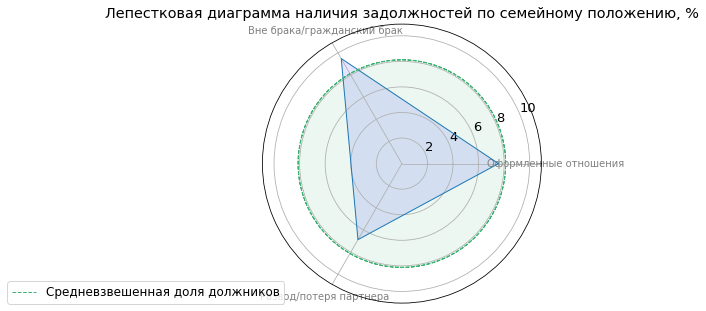

In [31]:
# Данные для диаграммы
N = len(name_of_status_new)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False) 
theta = np.append(theta, theta[:1])
radii = group_comp1_next["Доля имевших задолжности по группам, %"].values
radii = np.append(radii, radii[:1])
# Отображение srider диаграммы для анализа
plt.subplot(111, polar=True)
plt.rcParams["figure.figsize"]=5,8
plt.title('Лепестковая диаграмма наличия задолжностей по семейному положению, %')
plt.xticks(theta[:-1], name_of_status_new, color="grey", size=10)
yticks_vals = [ 2, 4 , 6 , 8 , 10]
yticks_names= ["2", "4", "6", "8", "10"]
plt.yticks(yticks_vals, yticks_names, size=13)
plt.ylim(0,1.15*max(radii))
plt.plot(theta, radii, linewidth=1, linestyle='solid')
plt.fill(theta, radii, 'b', alpha=0.1)
# Среднее значение просрочки кредитов
theta1 = np.linspace(0, 2 * np.pi, 250, endpoint=False) 
theta1 = np.append(theta1, theta1[:-1])
radii1 = debt_relat*np.ones(250)
radii1 = np.append(radii1, radii1[:-1])
plt.plot(theta1, radii1, linewidth=1, linestyle='--', label="Средневзвешенная доля должников",  color="#3CB371")
plt.fill(theta1, radii1, "#3CB371", alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Вывод:** 
- Наличие официально оформенных отношений, улучшает показатели наличия задолжности по кредитам, по сравнению с групами  "не женат/ не замужем", "гражданский брак"	
- При этом группы  "вдовец / вдова" и "в разводе" являются самыми дисциплинированными - 7.06% и 6.62%;
  
**Рекомендации:**
- Учесть семейное положение при выдачи кредитов в порядке убывания ответственности "вдовец / вдова" - "в разводе" - "женат / замужем" - "гражданский брак" - "Не женат / не замужем"
- Ввиду схожести процента возврата по некоторым из групп, можно использовать следующую шкалу:

      1: "вдовец / вдова" и "в разводе",
      2: "женат / замужем",
      3: "гражданский брак" и "Не женат / не замужем"
  
- Хотя группы "вдовец / вдова" и "в разводе" схожи по размеру и проценту задолжностей, объединять их может быть и нецелесообразно в контексте возраста заемщика (скорее всего потеря партнера связана с естественными причинами - возрастом и соответственно "вдовец / вдова" косвенно характеризует заемщика по этому критерию). Может потребоваться дополнительное исследование.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Для наглядности данных (по аналогии с предыдущими оценками), целесообразно создать таблицу со следующими столбцами, в зависимости от дохода:
   - активность заемщиков (общее число действий с кредитами);
   - доля каждой группы к общему числу займов;
   - количество имевших задолжности;
   - доля имевших задолжности.
     
Цели:
1. Соотнести значимость групп по доли займов к общему числу займов;
2. Определить процент невозврата кредитов по группам;
3. Сделать вывод о необходимости учета дохода по группам при выдачи кредитов.

In [32]:
names_of_rows = ['Всего людей с кредитами, ч', 'Имевшие задолжность, ч']
category = 'total_income_category'
names_of_rows = ['Всего людей с кредитами, ч', 'Имевшие задолжность, ч']
name_of_status = ['<< 30000','30001-50000',  '50001-200000' , '200001-1000000' ,  '>> 1000001']
name_of_status.reverse()
group_comp2 = data.groupby(by=category).aggregate({'debt':['count','sum']})
group_comp2.columns = names_of_rows
group_comp2.insert (1, "Доля группы от общего числа заемщиков, %", (group_comp2['Всего людей с кредитами, ч']/total_count/0.01).round(2))
group_comp2["Доля имевших задолжности по группам, %"] = (group_comp2['Имевшие задолжность, ч']/group_comp2['Всего людей с кредитами, ч']/0.01).round(2)
group_comp2.insert (0, "Группа дохода", name_of_status)
print(f'Средневзвешенная доля должников: {debt_relat} %')
group_comp2.sort_values(by='Доля имевших задолжности по группам, %')


Средневзвешенная доля должников: 8.12 %


,Группа дохода,"Всего людей с кредитами, ч","Доля группы от общего числа заемщиков, %","Имевшие задолжность, ч","Доля имевших задолжности по группам, %"
total_income_category,,,,,
D,30001-50000,349,1.64,21,6.02
B,200001-1000000,5014,23.51,354,7.06
A,>> 1000001,25,0.12,2,8.00
C,50001-200000,15921,74.64,1353,8.50
E,<< 30000,22,0.10,2,9.09


#### Результаты:
1) Фактически существуют две большие группы по доходу - "50001-200000" и "200001-1000000",  74.64% и 23.51% заемщиков;
2) Сравнивая результат для этих двух групп видно, что с увеличением дохода доля задолжностей падает (-1.44%) 
3) Остальные группы по численности минимальны;

Так как группы дохода основаны на количественной величине, целесообразнее строить не лепестковую диаграмму, а обычную столбцами. Тогда значения по X будут сортированными по возрастанию и можно попробовать выявить какую либо тенденцию.


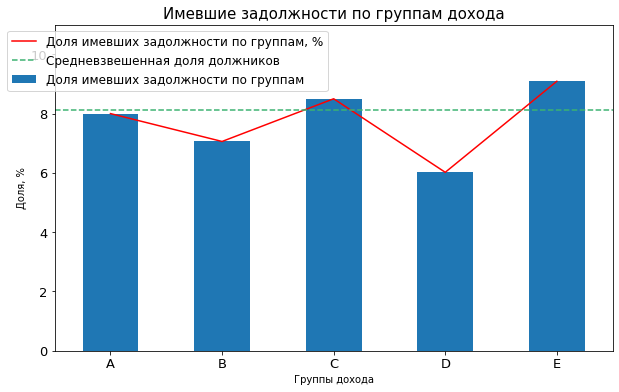

In [33]:
group_comp2["Доля имевших задолжности по группам, %"].plot(kind='bar',  figsize=(10,6), fontsize=13, label='Доля имевших задолжности по группам');
group_comp2["Доля имевших задолжности по группам, %"].plot(kind='line', figsize=(10,6), fontsize=13, color = "r");
plt.title("Имевшие задолжности по группам дохода", fontsize=15)
plt.ylabel("Доля, %", fontsize=10)
plt.xlabel("Группы дохода", fontsize=10);
plt.axhline(y = debt_relat, color = "#3CB371", linestyle = '--', label='Средневзвешенная доля должников')
plt.ylim(0, 11) 
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1))


**Вывод:** 
- Полученные на текущий момент результаты недостаточно формализуют критерий дохода, оставляя возможным сделать только общий вывод о  снижении задолжностей по кредитам с ростом доходов (в рамках двух больших групп);
- В отличии от категорий с количеством детей, здесь категоризация была выполнено некорректно или требует дополнительных пояснений (может быть сделать группы более равновесными по количеству людей в них и т.п.).
  
**Рекомендации:**
- Скорректировать категоризацию по доходу при постановки задачи, для более точной оценки его влияния.

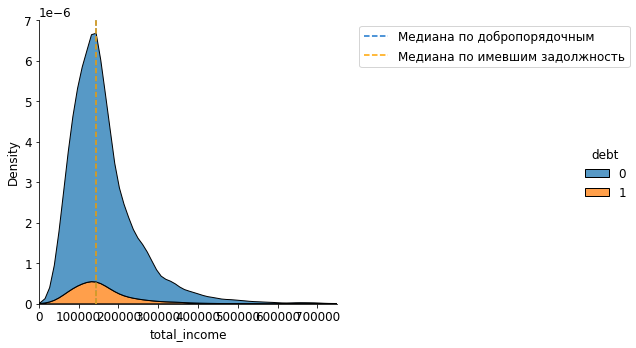

Медиана по добропорядочным  142594.0
Медиана по имевшим задолжность 142594.0


In [34]:
good_boys = data['total_income'].loc[data['debt']==0].median()
bad_boys = data['total_income'].loc[data['debt']==1].median()

sns.displot(data = data, x = 'total_income', hue = 'debt', kind='kde', multiple = 'stack' )
plt.axvline(x=good_boys, label = 'Медиана по добропорядочным', color ='#1874CD', linestyle='dashed')
plt.axvline(x=bad_boys,  label = 'Медиана по имевшим задолжность', color ='orange', linestyle='dashed')
plt.xlim([0, 750000])
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()
print(f'Медиана по добропорядочным  {good_boys}')
print(f'Медиана по имевшим задолжность {bad_boys}')

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Для наглядности данных (по аналогии с предыдущими оценками), целесообразно создать таблицу со следующими столбцами, в зависимости от дохода:
   - активность заемщиков (общее число действий с кредитами);
   - доля каждой группы к общему числу займов;
   - количество имевших задолжности;
   - доля имевших задолжности.
     
Цели:
1. Соотнести значимость групп по доли займов к общему числу займов;
2. Определить процент невозврата кредитов по группам;
3. Сделать вывод о необходимости учета дохода по группам при выдачи кредитов.

In [35]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
names_of_rows = ['Всего людей с кредитами, ч', 'Имевшие задолжность, ч']
category = 'purpose_category'
names_of_rows = ['Всего людей с кредитами, ч', 'Имевшие задолжность, ч']
name_of_status = ['операции с автомобилем', 'операции с недвижимостью',
       'получение образования', 'проведение свадьбы']
group_comp3 = data.groupby(by=category).aggregate({'debt':['count','sum']})
group_comp3.columns = names_of_rows
group_comp3.insert (1, "Доля группы от общего числа заемщиков, %", (group_comp3['Всего людей с кредитами, ч']/total_count/0.01).round(2))
group_comp3["Доля имевших задолжности по группам, %"] = (group_comp3['Имевшие задолжность, ч']/group_comp3['Всего людей с кредитами, ч']/0.01).round(2)
print(f'Средневзвешенная доля должников: {debt_relat} %')
group_comp3.sort_values(by='Доля имевших задолжности по группам, %')


Средневзвешенная доля должников: 8.12 %


,"Всего людей с кредитами, ч","Доля группы от общего числа заемщиков, %","Имевшие задолжность, ч","Доля имевших задолжности по группам, %"
purpose_category,,,,
операции с недвижимостью,10751,50.40,780,7.26
проведение свадьбы,2313,10.84,183,7.91
получение образования,3988,18.70,369,9.25
операции с автомобилем,4279,20.06,400,9.35


#### Результаты:
1) Группы сопоставимы по размеру;
2) "операции с недвижимостью" и "проведение свадьбы" значение задолжности составляет 7.26% и 7.91% соответственно;
3) "получение образования" и "операции с автомобилем" значение задолжности составляет 9.25% и 9.35% соответственно.

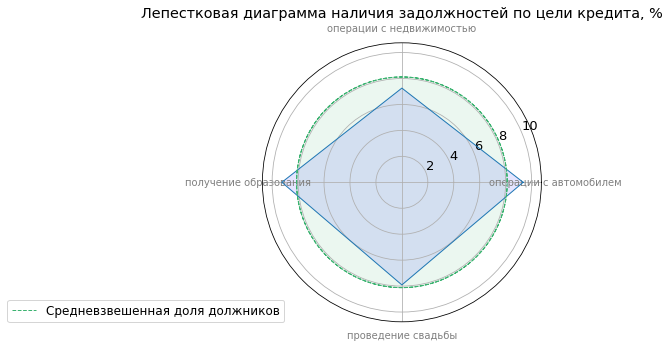

In [36]:
# Данные для диаграммы
N = len(name_of_status)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False) 
theta = np.append(theta, theta[:1])
radii = group_comp3["Доля имевших задолжности по группам, %"].values
radii = np.append(radii, radii[:1])
# Отображение srider диаграммы для анализа
plt.subplot(111, polar=True)
plt.rcParams["figure.figsize"]=5,8
plt.title('Лепестковая диаграмма наличия задолжностей по цели кредита, %')
plt.xticks(theta[:-1], name_of_status, color="grey", size=10)
yticks_vals = [ 2, 4 , 6 , 8 , 10]
yticks_names= ["2", "4", "6", "8", "10"]
plt.yticks(yticks_vals, yticks_names, size=13)
plt.ylim(0,1.15*max(radii))
plt.plot(theta, radii, linewidth=1, linestyle='solid')
plt.fill(theta, radii, 'b', alpha=0.1)
# Среднее значение просрочки кредитов
theta1 = np.linspace(0, 2 * np.pi, 250, endpoint=False) 
theta1 = np.append(theta1, theta1[:-1])
radii1 = debt_relat*np.ones(250)
radii1 = np.append(radii1, radii1[:-1])
plt.plot(theta1, radii1, linewidth=1, linestyle='--', label="Средневзвешенная доля должников",  color="#3CB371")
plt.fill(theta1, radii1, "#3CB371", alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Вывод:** 
- По наличию задолжности и цели кредита можно выделить две большие группы (1) "операции с недвижимостью"/"проведение свадьбы" и (2) "получение образования"/"операции с автомобилем". В первом случае наличие задолжности составляет порядка 7.5 %, а во втором 9.3 %

**Рекомендации:**
- Учесть категорию по цели кредита при его выдачи, как влияющую на возникновение задолжности. Учитывать, что для групп "операции с недвижимостью", "проведение свадьбы" по сравнению с "получение образования","операции с автомобилем" доля задолжностей ниже на порядка 1.8 %


**Вывод:** 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
Так как на стадии обработки данных, получено, что количество пропусков в графах "дней на работе" и "заработок" совпадает с суммарным числом пропусков. Можно заключить, что это связанно с тем, что эти люди были безработными.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
Это консервативное решение, увеличивающее вклад средневзвешенного значения при анализе данных, при этом недопускающее необоснованный роста дисперсии иследуемой величины

### Шаг 4: общий вывод.

1) Качество данных:
   - предоставленные данные высокого качества, нетребующие значительной корректировки (доля потерянных строк таблицы ~ 0.01%).
   
2) Выявленные пропуски в данных связаны с тем, что люди являясь безработными не заполняли графы связанные со временем прибывания на работе и среднему доходу.

3)  Категоризация для анализа
   - количеством детей  (корректно);
   - семейное положение (корректно);
   - по доходу (требует дополнительного исследования);
   - цели кредита (корректно).
   
4)  Результаты

**Количество детей:**
    
            - семьи без детей лучше всего возвращают кредиты;
            - наличие 1 и 2 детей при выдачи кредитов приводит к незначительному росту задолжности(+ 1.7%);
            - для семей с более чем 3 детьми процент возврата хуже чем у бездетных (+0.62%), но лучше чем у семей с 
              1-2 детьми (-1.1%);
            - количество операций с кредитами для семей с 3+ детей незначительно  и составляет 1.5% от общего числа,
              целесообразно объединить их в общую группу.
            
**По семейному положению:**

    
            - группы  "вдовец / вдова" и "в разводе" являются самыми дисциплинированными - 7.06% и 6.62%;
            - семейное положение при выдачи кредитов влияет в порядке убывания ответственности(роста задолжностей) "вдовец /  
              вдова" - "в разводе" - "женат / замужем" - "гражданский брак" - "Не женат / не замужем";
            - ввиду схожести процента возврата по некоторым из групп, можно использовать следующие обобщенные группы:  
             "вдовец/вдова /в разводе", "женат / замужем", "гражданский брак/ Не женат / не замужем";
            - следует обратить внимание на возможную корреляцию группы "вдовец / вдова" с возрастными группами;
            - следует обратить внимание на возможную корреляцию  критерия "семейного положения" с "количеством детей".

**По доходу:**

            - предложенная категоризация привела к формированию неравнозначных по размеру групп заемщиков;
            - по двум наиболее представленным группам, можно сделать достаточно общий вывод о росте задолжностей с 
              уменьшением дохода;
            - необходимо уточнение при формировании критерия распределения по группам дохода;
            - хотя выполнено заполнение пропусков с помощью медианных значений, в данном случае целесообразно рассматривать
              отдельную группу людей неимеющих работу и не получающих дохода;
            - желательно дополнительно проверить источник данных, так как выявлено совпадение медианных значений дохода для
              групп имеющих задолжности и без задолжностей.

**По целе кредита:**

            - сформированные группы сопоставимы по количеству заемщиков;
            - для групп "получение образования"/"операции с автомобилем" сформировалось порядка 9.3 % задолжностей, а 
              для групп "операции с недвижимостью"/"проведение свадьбы" она составила  7.5 % ;
            - при выдачи кредита необходимо учитывать категорию его цели, как влияющую на возникновение задолжности.

  
